In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from matplotlib import units
from tensorflow.keras.optimizers import Adam
import random

In [2]:

opt=Adam(learning_rate=0.001)
ds = tf.keras.datasets.mnist
(dxtrain,dytrain),(dxtest,dytest)=ds.load_data()
dxtrain=tf.keras.utils.normalize(dxtrain,axis=1)
dxtest=tf.keras.utils.normalize(dxtest,axis=1)

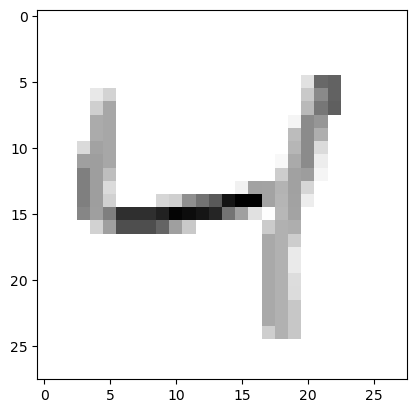

In [3]:
plt.imshow(dxtrain[2],cmap=plt.cm.binary)
plt.show()

In [4]:

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128,activation="relu"))
model.add(tf.keras.layers.Dense(units=128,activation="relu"))
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

model.fit(dxtrain,dytrain,epochs=3)

model.save("../vs/data/model/mnist1.model")

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2611 - accuracy: 0.9236
Epoch 2/3
1875/1875 [==============================] - 2s 850us/step - loss: 0.1045 - accuracy: 0.9681
Epoch 3/3
1875/1875 [==============================] - 2s 818us/step - loss: 0.0720 - accuracy: 0.9772
INFO:tensorflow:Assets written to: ../vs/data/model/mnist1.model\assets


In [5]:
model = tf.keras.models.load_model("../vs/data/model/mnist1.model")

May be  4


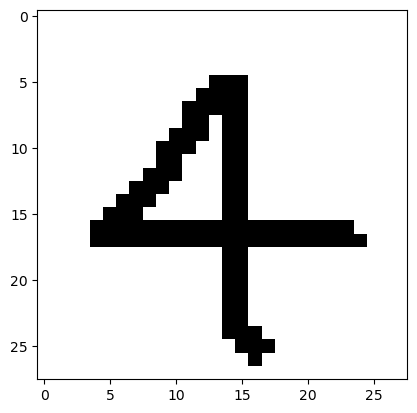

In [6]:

pic=cv.imread("../vs/data/dataset/hand-writing/picture.png")[:,:,0]
pic=np.invert(np.array([pic]))
pic1=tf.keras.utils.normalize(pic,axis=1)
resultt=model.predict(pic1)
print("May be ",np.argmax(resultt))
plt.imshow(pic[0],cmap=plt.cm.binary)
plt.show()